## Final Project
### Data Science LHL Project: Restaurant Reccomenation system

### Part 2: Data Preparation: Data Cleaning and EDA

By: Chloe Phuong

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [33]:
restrev_df = pd.read_json('restrev_df')

restrev_df

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,review_id,user_id,stars_left,text,date
0,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,NaN,sR9e_G0JdycDTGV4S-Ma2w,qXztukjlJFpu3T-EmSWIIQ,5.0,"Incredible, the chicken is so tender, seasonin...",2023-02-12 11:07:53
1,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,NaN,ArpqFM_KEDrP0fJScO09Zw,KhpA23RweKsO9TDaGpE2xg,4.0,We were able to check this place out yesterday...,2022-04-25 12:51:22
2,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,NaN,w56U5WwwCzd2Sz9aXsuXjQ,XbiKsujS_qxU3xsr0xUqmQ,4.0,I think this will be our go-to before any even...,2022-06-03 10:01:45
3,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,NaN,sR9e_G0JdycDTGV4S-Ma2w,qXztukjlJFpu3T-EmSWIIQ,5.0,"Incredible, the chicken is so tender, seasonin...",2023-02-12 11:07:53
4,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,NaN,ArpqFM_KEDrP0fJScO09Zw,KhpA23RweKsO9TDaGpE2xg,4.0,We were able to check this place out yesterday...,2022-04-25 12:51:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,NaN,xTaL-8592nVx7mjYKz1f8g,C282JQOYkRWeAjAcfKlK1g,4.0,Great spot in Parkdale serving French course m...,2022-10-12 16:02:20
5898,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,NaN,-bZ8wE7TaRDkMuBeLM91zQ,RD365MaKbCCjpZQ2KkxROg,5.0,This felt just like a typical Parisian restaur...,2023-07-04 05:45:57
5899,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,NaN,ZcWCQcO_eKKZ0Z5mdY6K-g,ykWqtFWldi0bojZ6rorFgg,1.0,This is one of our favourite go to-s in the ne...,2023-02-15 05:28:11
5900,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,NaN,xTaL-8592nVx7mjYKz1f8g,C282JQOYkRWeAjAcfKlK1g,4.0,Great spot in Parkdale serving French course m...,2022-10-12 16:02:20


#### Data Cleaning and Transformation

In [34]:
restrev_df.shape

(5902, 17)

In [35]:
restrev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 0 to 5901
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   business_id   5902 non-null   object        
 1   name          5902 non-null   object        
 2   address       5902 non-null   object        
 3   city          5902 non-null   object        
 4   postal_code   5902 non-null   object        
 5   latitude      5902 non-null   float64       
 6   longitude     5902 non-null   float64       
 7   stars         5902 non-null   float64       
 8   review_count  5902 non-null   int64         
 9   is_open       5902 non-null   bool          
 10  categories    5902 non-null   object        
 11  hours         0 non-null      float64       
 12  review_id     5580 non-null   object        
 13  user_id       5580 non-null   object        
 14  stars_left    5580 non-null   float64       
 15  text          5580 non-null   object  

In [36]:
#Deleting Unnnecessary Columns
restrev_df = restrev_df.drop(['hours'],axis=1)

In [37]:
restrev_df.shape

(5902, 16)

In [38]:
# Remove rows with NaN values in specific columns
columns_to_check = ['review_id', 'user_id', 'stars_left', 'text', 'date']
restrev_df = restrev_df.dropna(subset=columns_to_check)

# Reset the index
restrev_df = restrev_df.reset_index(drop=True)

In [39]:
restrev_df

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,categories,review_id,user_id,stars_left,text,date
0,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,sR9e_G0JdycDTGV4S-Ma2w,qXztukjlJFpu3T-EmSWIIQ,5.0,"Incredible, the chicken is so tender, seasonin...",2023-02-12 11:07:53
1,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,ArpqFM_KEDrP0fJScO09Zw,KhpA23RweKsO9TDaGpE2xg,4.0,We were able to check this place out yesterday...,2022-04-25 12:51:22
2,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,w56U5WwwCzd2Sz9aXsuXjQ,XbiKsujS_qxU3xsr0xUqmQ,4.0,I think this will be our go-to before any even...,2022-06-03 10:01:45
3,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,sR9e_G0JdycDTGV4S-Ma2w,qXztukjlJFpu3T-EmSWIIQ,5.0,"Incredible, the chicken is so tender, seasonin...",2023-02-12 11:07:53
4,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,ArpqFM_KEDrP0fJScO09Zw,KhpA23RweKsO9TDaGpE2xg,4.0,We were able to check this place out yesterday...,2022-04-25 12:51:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,ZcWCQcO_eKKZ0Z5mdY6K-g,ykWqtFWldi0bojZ6rorFgg,1.0,This is one of our favourite go to-s in the ne...,2023-02-15 05:28:11
5576,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,xTaL-8592nVx7mjYKz1f8g,C282JQOYkRWeAjAcfKlK1g,4.0,Great spot in Parkdale serving French course m...,2022-10-12 16:02:20
5577,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,-bZ8wE7TaRDkMuBeLM91zQ,RD365MaKbCCjpZQ2KkxROg,5.0,This felt just like a typical Parisian restaur...,2023-07-04 05:45:57
5578,HHvO4MgBFabsmlInou6viQ,Le Baratin,"1600 Dundas Street. W, Toronto, ON M6K 1T8, Ca...",Toronto,M6K 1T8,43.65007,-79.43510,4.5,130,True,French,ZcWCQcO_eKKZ0Z5mdY6K-g,ykWqtFWldi0bojZ6rorFgg,1.0,This is one of our favourite go to-s in the ne...,2023-02-15 05:28:11


In [40]:
# Getting an accurate count of reviews per restaurant (index)
restrev_df.groupby(['business_id'])['review_id'].transform('count')

0       24
1       24
2       24
3       24
4       24
        ..
5575    24
5576    24
5577    24
5578    24
5579    24
Name: review_id, Length: 5580, dtype: int64

In [41]:
restrev_df.rename({'stars_left': 'review_stars', 'name': 'rest_name', 'stars': 'rest_avg_stars', \
                   'review_count': 'total_reviews', 'text': 'review_text'}, axis=1, inplace=True)

restrev_df.head(3)

,business_id,rest_name,address,city,postal_code,latitude,longitude,rest_avg_stars,total_reviews,is_open,categories,review_id,user_id,review_stars,review_text,date
0,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,sR9e_G0JdycDTGV4S-Ma2w,qXztukjlJFpu3T-EmSWIIQ,5.0,"Incredible, the chicken is so tender, seasonin...",2023-02-12 11:07:53
1,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,ArpqFM_KEDrP0fJScO09Zw,KhpA23RweKsO9TDaGpE2xg,4.0,We were able to check this place out yesterday...,2022-04-25 12:51:22
2,Ohengzi4viLEXqhK50aLxg,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",Toronto,M4L 1G1,43.66627,-79.31802,4.5,15,True,Caribbean,w56U5WwwCzd2Sz9aXsuXjQ,XbiKsujS_qxU3xsr0xUqmQ,4.0,I think this will be our go-to before any even...,2022-06-03 10:01:45


The following columns will be updated to have a datatype of int32 for memory efficiency: review_stars, total_reviews, is_open. 

In [42]:
conv_dict = {'review_stars': 'int32', 'total_reviews': 'int32'}
restrev_df = restrev_df.astype(conv_dict)

In [43]:
restrev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   business_id     5580 non-null   object        
 1   rest_name       5580 non-null   object        
 2   address         5580 non-null   object        
 3   city            5580 non-null   object        
 4   postal_code     5580 non-null   object        
 5   latitude        5580 non-null   float64       
 6   longitude       5580 non-null   float64       
 7   rest_avg_stars  5580 non-null   float64       
 8   total_reviews   5580 non-null   int32         
 9   is_open         5580 non-null   bool          
 10  categories      5580 non-null   object        
 11  review_id       5580 non-null   object        
 12  user_id         5580 non-null   object        
 13  review_stars    5580 non-null   int32         
 14  review_text     5580 non-null   object        
 15  date

Exploring any missing information in the rest_revdf dataset.

In [44]:
restrev_df.isna().mean()

business_id       0.0
rest_name         0.0
address           0.0
city              0.0
postal_code       0.0
latitude          0.0
longitude         0.0
rest_avg_stars    0.0
total_reviews     0.0
is_open           0.0
categories        0.0
review_id         0.0
user_id           0.0
review_stars      0.0
review_text       0.0
date              0.0
dtype: float64

In [45]:
restrev_df.describe()

,latitude,longitude,rest_avg_stars,total_reviews,review_stars
count,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000
mean,43.658862,-79.387737,4.327778,363.242652,4.385663
std,0.010513,0.029975,0.352060,694.944620,0.970441
min,43.636608,-79.465596,2.000000,1.000000,1.000000
25%,43.651373,-79.399684,4.000000,26.000000,4.000000
50%,43.659392,-79.384490,4.500000,61.000000,5.000000
75%,43.663020,-79.378820,4.500000,396.000000,5.000000
max,43.703830,-79.277560,5.000000,3429.000000,5.000000


#### EDA

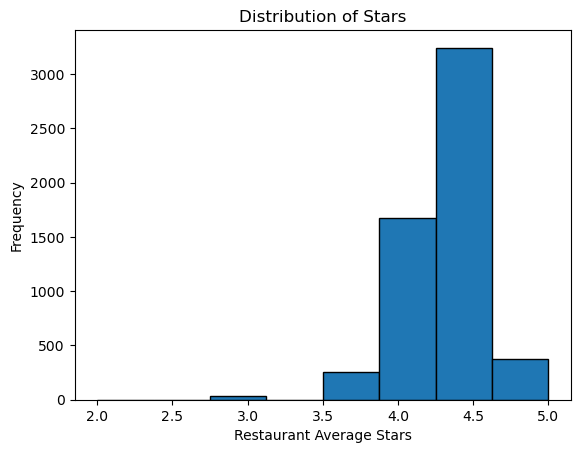

In [46]:
# Plot histogram of stars
plt.hist(restrev_df['rest_avg_stars'], bins=8, edgecolor='black')
plt.xlabel('Restaurant Average Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')
plt.show()

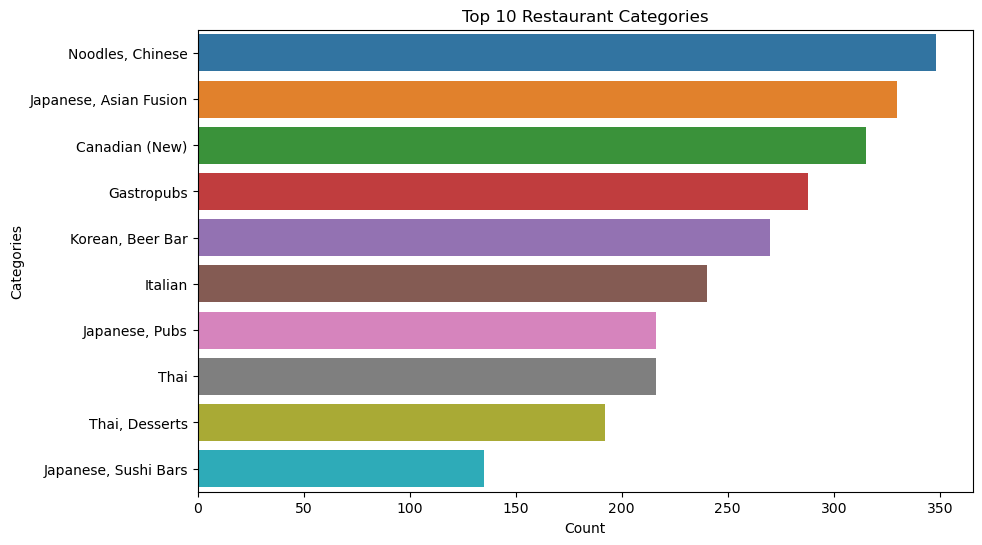

In [47]:
# Bar Chart of Categories
# Count the frequency of each category
category_counts = restrev_df['categories'].value_counts().head(10)

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Top 10 Restaurant Categories')
plt.show()

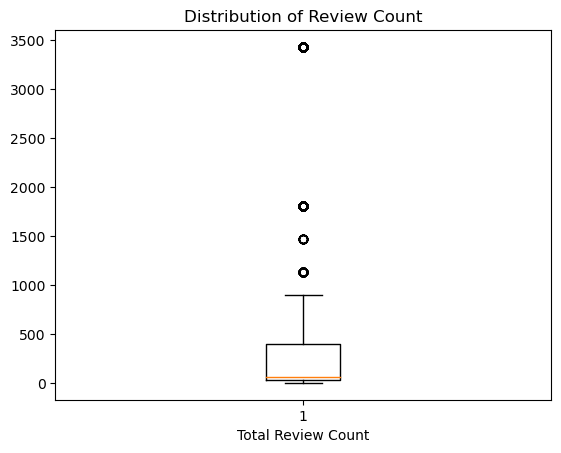

In [48]:
# Create box plot of review count
plt.boxplot(restrev_df['total_reviews'])
plt.xlabel('Total Review Count')
plt.title('Distribution of Review Count')
plt.show()

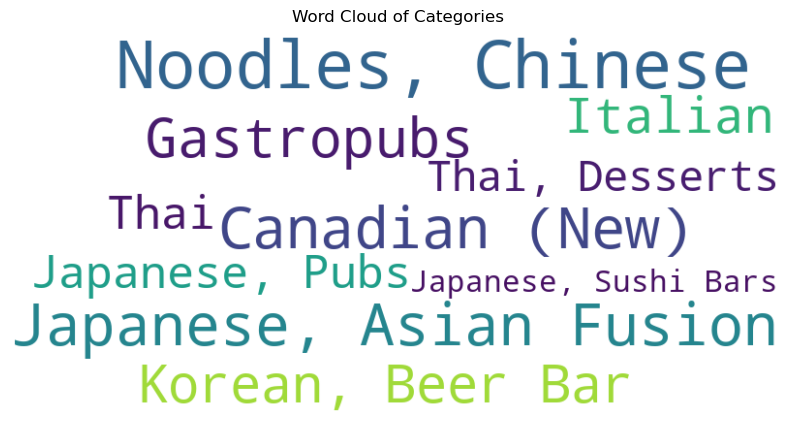

In [49]:
# Word cloud of categories
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()

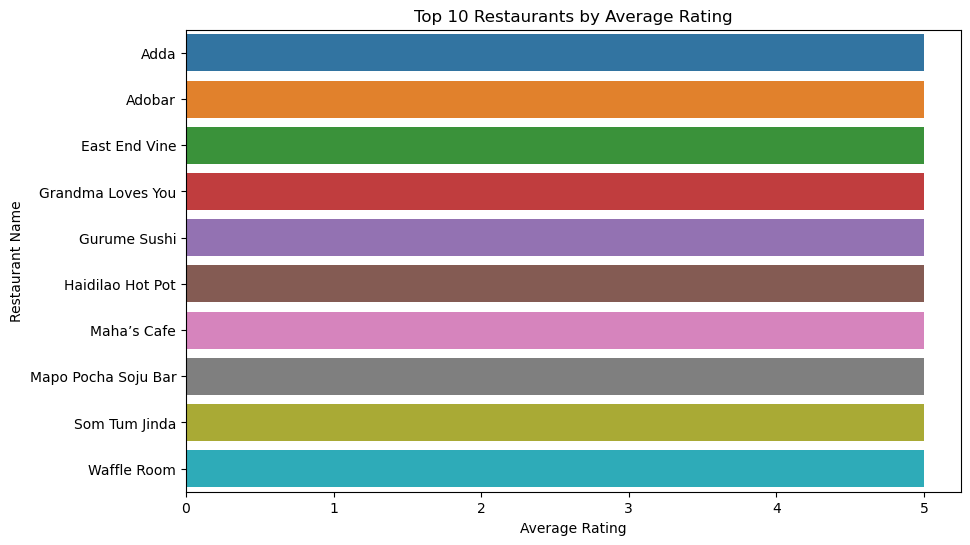

In [50]:
# Get the top 10 restaurants based on average rating and sort by restaurant name
top_restaurants = restrev_df[['business_id', 'rest_name', 'rest_avg_stars']].drop_duplicates().nlargest(10, 'rest_avg_stars').sort_values('rest_name')

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='rest_avg_stars', y='rest_name', data=top_restaurants, orient='h')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants by Average Rating')
plt.show()

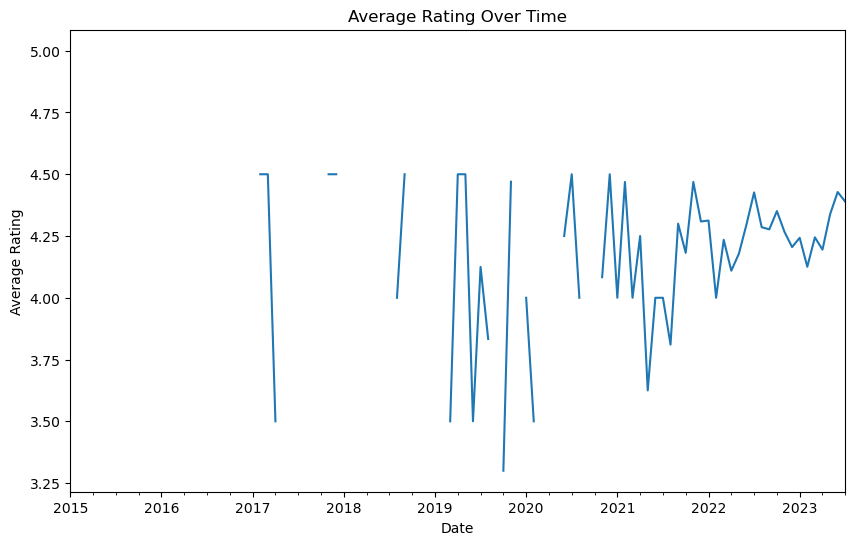

In [51]:
# Convert the 'date' column to datetime data type
restrev_df['date'] = pd.to_datetime(restrev_df['date'])

# Set the 'date' column as the DataFrame index
restrev_df.set_index('date', inplace=True)

# Plot a time series chart of average ratings over time
plt.figure(figsize=(10, 6))
restrev_df['rest_avg_stars'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')
plt.show()

In [ ]:
import folium

# Create a folium.Map object with initial center point and zoom level
map_restaurants = folium.Map(location=[restrev_df['latitude'].mean(), restrev_df['longitude'].mean()], zoom_start=12)

# Add markers for each restaurant location
for index, row in restrev_df.iterrows():
    name = row['rest_name']
    lat = row['latitude']
    lon = row['longitude']
    rating = row['rest_avg_stars']
    popup_text = f"Name: {name}<br>Rating: {rating}"
    folium.Marker(location=[lat, lon], popup=popup_text).add_to(map_restaurants)

# Display the map
map_restaurants

Top 10 Most Common Postal Codes:
 M5G 1C3    429
M5B 2M2    330
M5H 3W4    297
M2M 2V3    270
M5B 2A2    219
M5B 1G6    192
M5H 3G8    180
M5H 1L6    168
M6R        120
M5V 1E3    108
Name: postal_code, dtype: int64


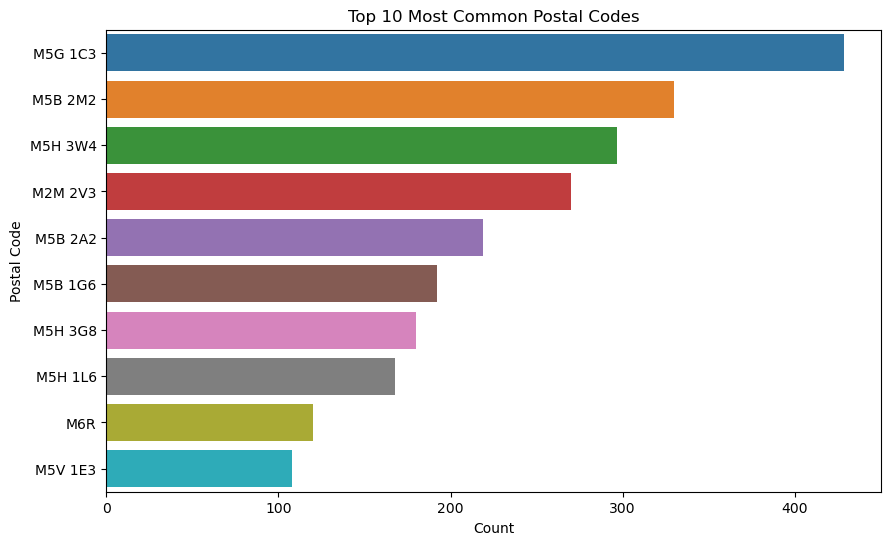

In [53]:
# Frequency distribution of postal codes
postal_counts = restrev_df['postal_code'].value_counts().head(10)
print('Top 10 Most Common Postal Codes:\n', postal_counts)

# Bar plot of postal code distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=postal_counts.values, y=postal_counts.index)
plt.xlabel('Count')
plt.ylabel('Postal Code')
plt.title('Top 10 Most Common Postal Codes')
plt.show()

In [56]:
restrev_df.reset_index(drop=True, inplace=True)
restrev_df.to_json('final_restrev_df.json', orient='records')

In [57]:
# Save final_restrev_df to json file
restrev_df.to_json('final_restrev_df')